<a href="https://colab.research.google.com/github/MauroTalamantes/EntropiaFiltroMediaFiltroMediana/blob/main/EntropiaFiltroMediaFiltroMediana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/05-Detection/colonca1.jpeg')

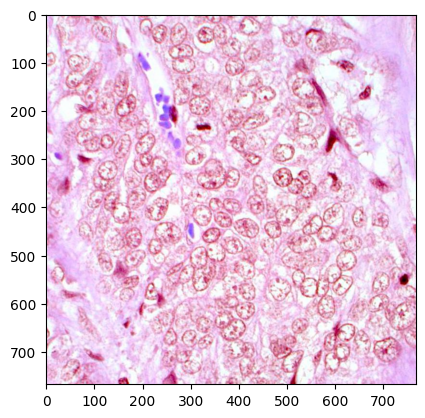

In [ ]:
plt.imshow(img)
plt.show()

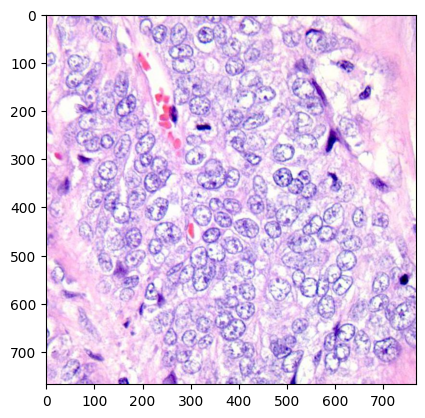

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

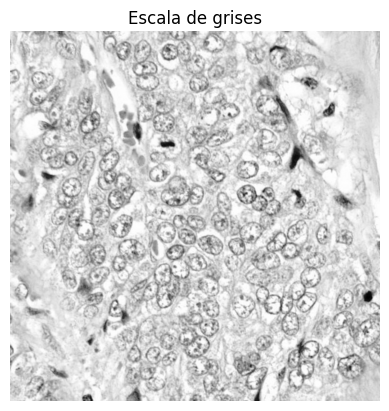

In [ ]:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')
plt.title("Escala de grises")
plt.axis('off')
plt.show()

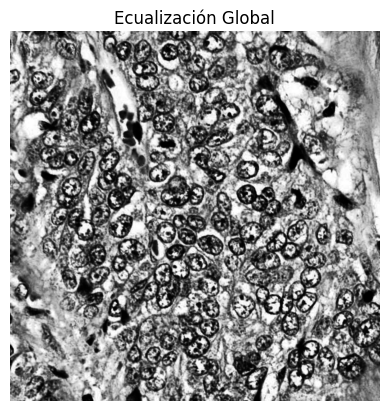

In [ ]:
equalized = cv2.equalizeHist(gray)
plt.imshow(equalized, cmap = 'gray')
plt.title("Ecualización Global")
plt.axis('off')
plt.show()

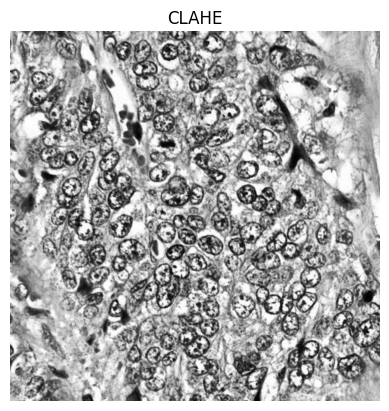

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(gray)
plt.imshow(clahe_img, cmap = 'gray')
plt.title("CLAHE")
plt.axis('off')
plt.show()

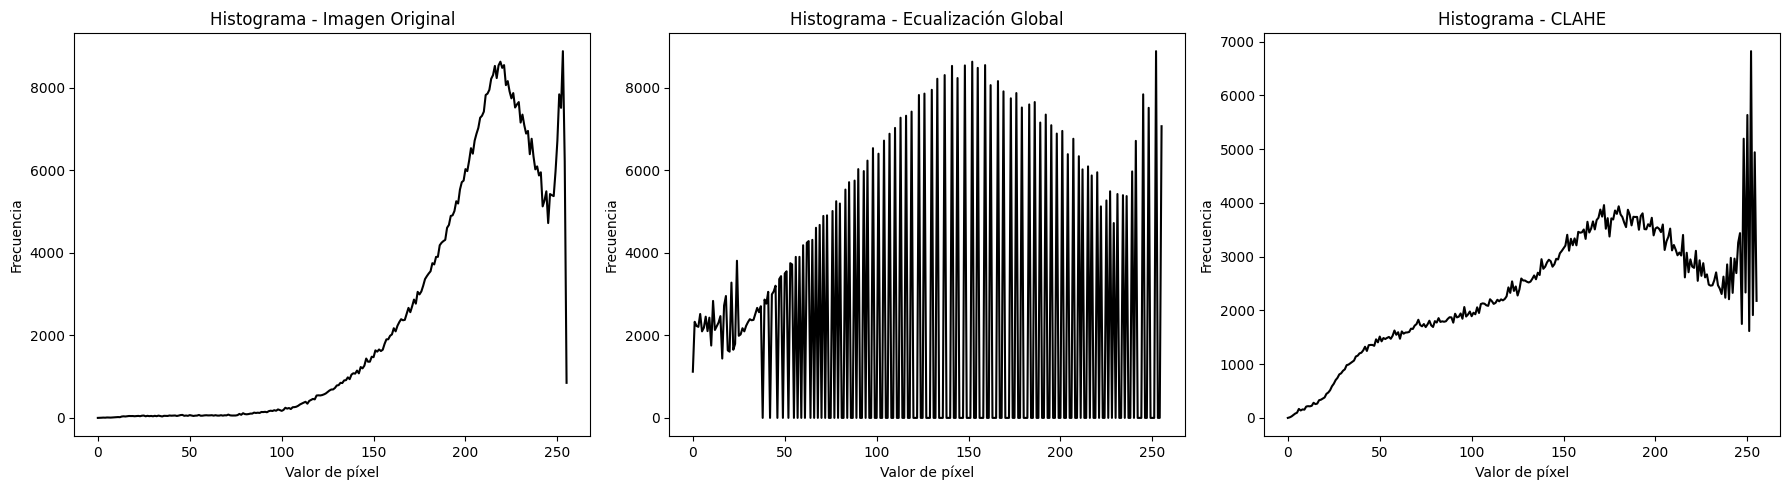

In [ ]:
hist_orig = cv2.calcHist([gray], [0], None, [256], [0, 256])
hist_eq = cv2.calcHist([equalized], [0], None, [256], [0, 256])
hist_clahe = cv2.calcHist([clahe_img], [0], None, [256], [0, 256])

# Graficar histogramas
plt.figure(figsize = (18, 5))

plt.subplot(1, 3, 1)
plt.plot(hist_orig, color = 'black')
plt.title('Histograma - Imagen Original')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.plot(hist_eq, color = 'black')
plt.title('Histograma - Ecualización Global')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
plt.plot(hist_clahe, color = 'black')
plt.title('Histograma - CLAHE')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

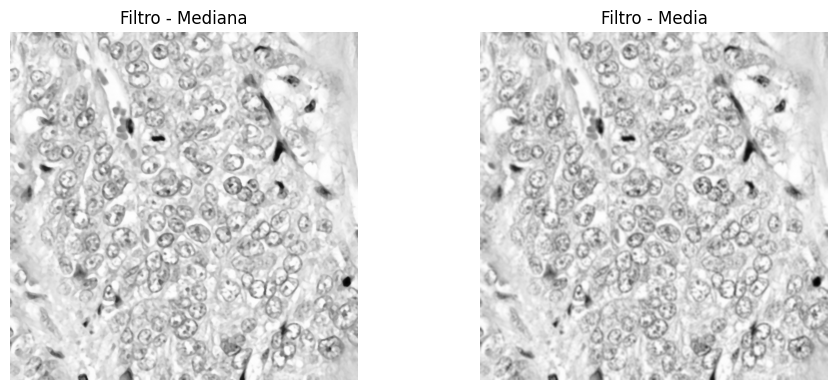

In [ ]:
# Filtro media y mediana
median = cv2.medianBlur(gray, 5)
mean = cv2.blur(gray,(5,5))

plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.imshow(median, cmap = 'gray')
plt.title('Filtro - Mediana')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mean, cmap = 'gray')
plt.title('Filtro - Media')
plt.axis('off')

plt.tight_layout()
plt.show()

Estadísticas
Original             Media = 206.29, Desv. Estándar = 34.88, Varianza = 1216.90
Filtro Mediana       Media = 206.97, Desv. Estándar = 32.05, Varianza = 1026.97
Filtro Media         Media = 206.30, Desv. Estándar = 30.75, Varianza = 945.65


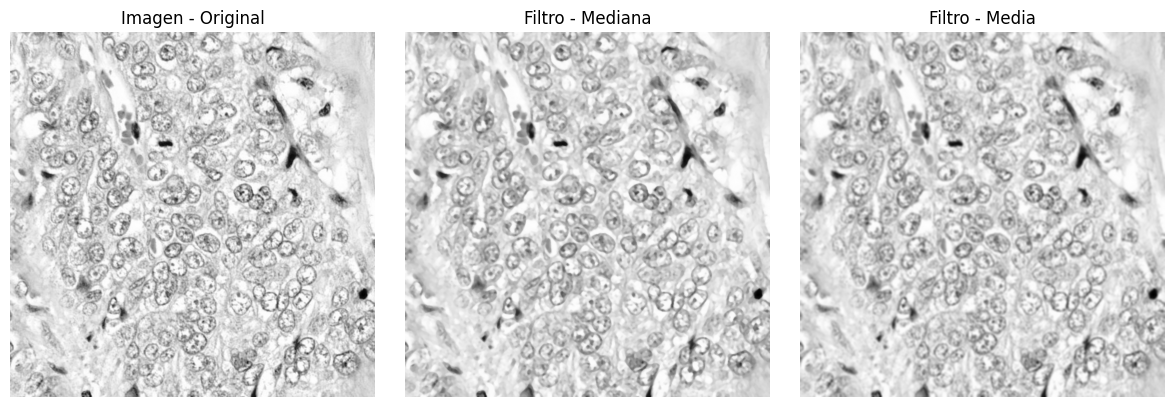

In [ ]:
img_median = cv2.medianBlur(gray, 5)
img_mean = cv2.blur(gray,(5,5))

# Función para calcular estadísticas

def calcular_estadisticas(nombre, imagen):
  media = np.mean(imagen)
  std = np.std(imagen)
  varianza= np.var(imagen)
  print(f"{nombre:<20} Media = {media:.2f}, Desv. Estándar = {std:.2f}, Varianza = {varianza:.2f}")

# Imprimir estadísticas
print("Estadísticas")
calcular_estadisticas("Original", gray)
calcular_estadisticas("Filtro Mediana", img_median)
calcular_estadisticas("Filtro Media", img_mean)

plt.figure(figsize = (12, 4))

plt.subplot(1, 3, 1)
plt.imshow(gray, cmap = 'gray')
plt.title('Imagen - Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_median, cmap = 'gray')
plt.title('Filtro - Mediana')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_mean, cmap = 'gray')
plt.title('Filtro - Media')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from skimage.measure import shannon_entropy

entropia_original = shannon_entropy(gray)
entropia_median = shannon_entropy(img_median)
entropia_media = shannon_entropy(img_mean)

print("Entropía original:", entropia_original)
print("Entropía Filtro Mediana:", entropia_median)
print("Entropía Filtro Media:", entropia_media)

Entropía original: 6.917612043996555
Entropía Filtro Mediana: 6.824727254986806
Entropía Filtro Media: 6.795677412841385
